# Covid-19 Cases Regression Model


## Problem Statment
Create a regression model for predicting new cases by using `owid-covid-data.csv`, in this dataset use `new_cases` column for label and use all other columns for features. You have to do feature analysis to select best features among them. For this regression model at minimum you have to achieve 85% accuracy. Feel free to try out different regression models to achieve the final results. 

##  Soltuion in steps
This notebook provides a complete regression model for **covid-19 cases**. We had divided this notebook in multiple steps for better understanding. We will proceed in the steps given below:

- **Step 1**: Loading dataset.
- **Step 2**: Analysis of features, which includes missing values imputation and correlartion analysis.
- **Step 3**: Validating selected features using Model Complexity graph and Learning Curves.
- **Step 4**: Regression Model Training.
- **Step 5**: Regression Model Testing.
- **Step 6**: Plotting Desicion Tree Regressor.

## Brief explanation of Steps
### Step 1
In **step 1** we have used `pandas` library to load the dataset in pandas DataFrame using `.read_csv()` function.

### Step 2
In features Analysis step, we first calculated the **missing entries** in each column of the dataset, after finding the percentage of **missing entries** we applied the following steps on the dataset:

- Drop the column which have **more than 30% missing entries**.
- Impute the entries of the column which have **less than 30% missing entries**.
- Apply correlation analysis and then select the best features among the slected ones.

### Step 3
In this step we have validated the model with best selected features, for the vaidation of model with features we had used two popular techniques:

- Model Complexity Graph
- Learning Curves

### Step 4
After validating the model with selected features, now we will **split the dataset** in training and testing sets. And then we will use training set to train our model with the help of **Grid Search** and **Cross Validation** techniques.

- **Cross Validation** prevents overfitting.
- **Grid Search** helps in finding the best hyper-parameters for the model.

### Step 5
In step 5 we will test the model with testing dataset, for finding the accuracy/performance of the model we will be using R2 score (coefficient of determination) this is one of the best accuracy metrics for regression models

### Step 6
As we are using **Desicion Tree Regressor** as our Model, in this step we will plot the Desicion Tree which will help in the visualization of Tree by which our model takes desicion.

## Importing Libraries
In the cell given below, we will import all the required libraries. We will also use **Warnings** library to hide unwanted warnings.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import visuals as vs
import seaborn as sb
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

# Importing visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

---------------------
# Step 1
## Loading Dataset
The dataset for this project originates from the [Our World In Data (Cases)](https://ourworldindata.org/covid-cases). The dataset has almost 26k entries and each of the 26k entries represent data about 33 features for Covid-19 cases for all countries uptill `'25-June-2020'`.

For loading dataset we will be using `pandas` library. We have dataset in `.csv` file format so we will use the function `.read_csv()`. In this function we just have to pass the file path, in our case it is `owid-covid-data.csv`.

In [2]:
# Load the Covid-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Splitting features and label
cases = data['new_cases']
features = data.drop('new_cases', axis = 1)

# Success - Displaying the records
display(features)

# Success
print("Covd-19 dataset has {} data points.".format(data.shape[0]))

,iso_code,continent,location,date,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26129,NaN,NaN,International,2020-02-28,705.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26130,NaN,NaN,International,2020-02-29,705.0,6.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26131,NaN,NaN,International,2020-03-01,705.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26132,NaN,NaN,International,2020-03-02,705.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Covd-19 dataset has 26134 data points.


-----
# Step 2
## Analysis of features
In this step we will explore the dataset, we will check the missing precentage of data for each feature and then we will use imputation techniques on them after that we will be doing correlartion analysis which will show us how many features are important to use and which one we have to drop. 

## Calculating Missing percentage
In the cell given below we will be calculating the missing percentage of data for each feature in the dataset. For this purpose we will be using `pandas` library `.isnull()` function. This function takes doesn't take any parameter. `.isnull()` function returns the sum of all missing entries which will be a number like `34` or `115` which shows how many entries have no data in the feature, for calculating the percentage of missing entries we have used the expression `.sum()*100/len(features)`.

For a better output we have used print function in this way `print(col,": %.2f%%"%miss)`, the expression `%.2f%%` tells the program to only show 2 decimel digits after decimel point for example it will output the values in this format `25.55%` . 

In [3]:
missing_percentage = features.isnull().sum()*100/len(features)

print("Missing values in percentage: \n")
for miss, col in zip(missing_percentage, features.columns):
    print(col,": %.2f%%"%miss)
    

Missing values in percentage: 

iso_code : 0.24%
continent : 0.93%
location : 0.00%
date : 0.00%
total_cases : 0.88%
total_deaths : 0.88%
new_deaths : 0.88%
total_cases_per_million : 1.12%
new_cases_per_million : 1.12%
total_deaths_per_million : 1.12%
new_deaths_per_million : 1.12%
total_tests : 71.95%
new_tests : 74.50%
total_tests_per_thousand : 71.95%
new_tests_per_thousand : 74.50%
new_tests_smoothed : 69.77%
new_tests_smoothed_per_thousand : 69.77%
tests_units : 67.38%
stringency_index : 20.05%
population : 0.24%
population_density : 4.33%
median_age : 9.61%
aged_65_older : 10.88%
aged_70_older : 10.07%
gdp_per_capita : 10.62%
extreme_poverty : 40.30%
cvd_death_rate : 9.55%
diabetes_prevalence : 6.57%
female_smokers : 27.44%
male_smokers : 28.27%
handwashing_facilities : 59.34%
hospital_beds_per_thousand : 17.26%
life_expectancy : 1.39%


## Deleting some features
Now we will drop some features from the dataframe. As we can see in the missing percentage of features we have many columns which have **more than 30%** missing values. We will drop those features which have **more than 30%** missing entries becuase if we impute them they will create bias which will decrease the model performance

In [4]:
selected_features = features.drop(["handwashing_facilities","extreme_poverty", "total_tests","new_tests","total_tests_per_thousand", "new_tests_smoothed","new_tests_smoothed_per_thousand","tests_units", "new_tests_per_thousand"], axis=1)

# Success - Displaying the records
display(selected_features)

,iso_code,continent,location,date,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26129,NaN,NaN,International,2020-02-28,705.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26130,NaN,NaN,International,2020-02-29,705.0,6.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26131,NaN,NaN,International,2020-03-01,705.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26132,NaN,NaN,International,2020-03-02,705.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Imputation
Now after dropping the columns in the previous cell, we will impute the features which have **less than 30%** missing entries. For our regression model we have tried many imputation techniques whcih are given below:

- Constant Value Imputation
- Mean Value Imputation
- Simple Imputor Function given by sklearn
- Multi Imputor Function given by sklearn

We didn't find any difference in the validation of model after applying all those imputations, so we will use the most simple imputation technique which is **Constant Value Imputation**. In this technique we just have to replace the missing entry with a constant value, for numerical data we will be using `0` and for non-numerical feature we will be using `Null` as our constant value. We will be using `pandas` library function `.fillna()` for filling up the missing entries. This function takes 2 input parameters, first the constant value, second parameter is `inplace` which is a boolean variable. Inplace is set to `True` so then the function replaces and saves the constant value in the dataframe.

In [69]:
constant_imputation_features = selected_features

constant_imputation_features["iso_code"].fillna("Null", inplace=True)
constant_imputation_features["continent"].fillna("Null", inplace=True)
constant_imputation_features["total_cases"].fillna(0, inplace=True)
constant_imputation_features["total_deaths"].fillna(0, inplace=True)
constant_imputation_features["new_deaths"].fillna(0, inplace=True)
constant_imputation_features["total_cases_per_million"].fillna(0, inplace=True)
constant_imputation_features["new_cases_per_million"].fillna(0, inplace=True)
constant_imputation_features["total_deaths_per_million"].fillna(0, inplace=True)
constant_imputation_features["new_deaths_per_million"].fillna(0, inplace=True)
constant_imputation_features["stringency_index"].fillna(0, inplace=True)
constant_imputation_features["population"].fillna(0, inplace=True)
constant_imputation_features["population_density"].fillna(0, inplace=True)
constant_imputation_features["median_age"].fillna(0, inplace=True)
constant_imputation_features["aged_65_older"].fillna(0, inplace=True)
constant_imputation_features["aged_70_older"].fillna(0, inplace=True)
constant_imputation_features["gdp_per_capita"].fillna(0, inplace=True)
constant_imputation_features["cvd_death_rate"].fillna(0, inplace=True)
constant_imputation_features["diabetes_prevalence"].fillna(0, inplace=True)
constant_imputation_features["female_smokers"].fillna(0, inplace=True)
constant_imputation_features["male_smokers"].fillna(0, inplace=True)
constant_imputation_features["hospital_beds_per_thousand"].fillna(0, inplace=True)
constant_imputation_features["life_expectancy"].fillna(0, inplace=True)

cases.fillna(0, inplace=True)

missing_percentage = constant_imputation_features.isnull().sum()*100/len(constant_imputation_features)

print("Missing values in percentage: \n")
for miss, col in zip(missing_percentage, constant_imputation_features.columns):
    print(col,": %.2f%%"%miss)

Missing values in percentage: 

iso_code : 0.00%
continent : 0.00%
location : 0.00%
date : 0.00%
total_cases : 0.00%
total_deaths : 0.00%
new_deaths : 0.00%
total_cases_per_million : 0.00%
new_cases_per_million : 0.00%
total_deaths_per_million : 0.00%
new_deaths_per_million : 0.00%
stringency_index : 0.00%
population : 0.00%
population_density : 0.00%
median_age : 0.00%
aged_65_older : 0.00%
aged_70_older : 0.00%
gdp_per_capita : 0.00%
cvd_death_rate : 0.00%
diabetes_prevalence : 0.00%
female_smokers : 0.00%
male_smokers : 0.00%
hospital_beds_per_thousand : 0.00%
life_expectancy : 0.00%


--------------------------------------------------------------------------------
## Correlation Analysis
Correlation analysis is use to find the associations between variables.The correlation coefficient is measured on a scale that varies from + 1 through 0 to - 1. Complete correlation between two variables is expressed by either + 1 or -1. When one variable increases as the other increases the correlation is positive; when one decreases as the other increases it is negative. Complete absence of correlation is represented by 0.

We are using pandas to calulate the correlation of a dataset, pandas function `.corr()` is used to calculate the correlation between features. There are 3 methods which can be used to calculate the correlation between features. we are using a standard one `Pearson method`, other two methods are `kendall` and `spearman`.

In [70]:
corr_analysis = constant_imputation_features.corr(method="pearson")
corr_analysis

,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
total_cases,1.000000,0.987253,0.767385,0.063884,0.034267,0.084861,0.036774,-0.038786,0.589788,-0.014980,0.026283,0.029962,0.030486,0.026527,-0.017234,0.022214,0.026408,0.014075,0.004507,0.011563
total_deaths,0.987253,1.000000,0.790789,0.065219,0.024504,0.133389,0.048376,-0.038403,0.597225,-0.016012,0.038802,0.049123,0.050714,0.030933,-0.032533,0.010933,0.039675,0.006879,0.003217,0.023527
new_deaths,0.767385,0.790789,1.000000,0.036071,0.042230,0.072691,0.103561,-0.031415,0.653743,-0.017788,0.031257,0.039791,0.040891,0.025531,-0.030081,0.017326,0.033347,0.003524,-0.002382,0.017315
total_cases_per_million,0.063884,0.065219,0.036071,1.000000,0.421468,0.630470,0.181097,-0.008962,-0.034280,0.061146,0.146052,0.054706,0.028411,0.267303,-0.245975,-0.027617,0.077511,-0.057719,0.017688,0.260684
new_cases_per_million,0.034267,0.024504,0.042230,0.421468,1.000000,0.163592,0.189065,0.057364,-0.018633,0.027603,0.063304,-0.006090,-0.013856,0.183349,-0.111207,0.040697,0.023501,-0.022029,-0.004845,0.126074
total_deaths_per_million,0.084861,0.133389,0.072691,0.630470,0.163592,1.000000,0.282245,0.039422,-0.017388,0.017845,0.183348,0.177984,0.162718,0.199133,-0.233913,-0.103427,0.177628,-0.060985,0.053463,0.257977
new_deaths_per_million,0.036774,0.048376,0.103561,0.181097,0.189065,0.282245,1.000000,0.065488,-0.007665,0.004607,0.094759,0.093457,0.087253,0.096632,-0.118324,-0.048399,0.096862,-0.034406,0.022421,0.128387
stringency_index,-0.038786,-0.038403,-0.031415,-0.008962,0.057364,0.039422,0.065488,1.000000,-0.090149,-0.105369,-0.179520,-0.120699,-0.099375,-0.045663,0.206673,0.035232,-0.015892,0.034846,-0.088185,-0.206955
population,0.589788,0.597225,0.653743,-0.034280,-0.018633,-0.017388,-0.007665,-0.090149,1.000000,-0.020336,-0.007757,-0.012439,-0.013904,-0.031799,0.016374,0.032323,-0.036084,0.049313,-0.012909,-0.033502
population_density,-0.014980,-0.016012,-0.017788,0.061146,0.027603,0.017845,0.004607,-0.105369,-0.020336,1.000000,0.059909,-0.009776,-0.041574,0.061909,-0.164244,0.014096,-0.072939,-0.033114,0.314781,0.201131


## Plotting heatmap
The cell below will generate the heatmap for the corrleation analysis, this will helps us in visualizing the results. For plotting the heatmap we will be using `Seaborn` library function `.heatmap()`, this function takes the information about the correlation analysis and heat map colour is given in `cmap` parameter.

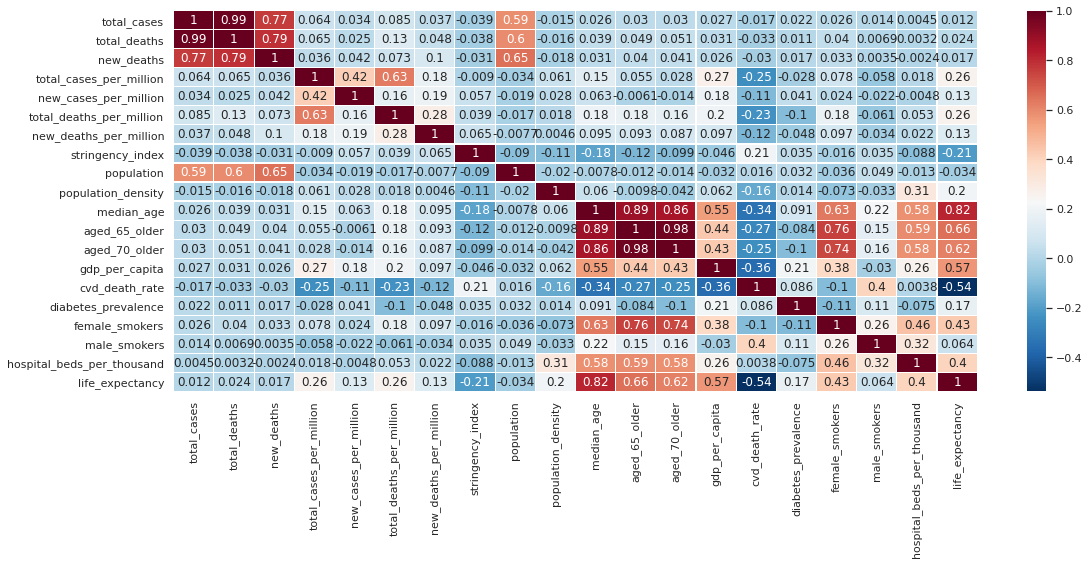

In [71]:
sb.set(rc={"figure.figsize":(18, 7)})
sb.heatmap(corr_analysis, 
            xticklabels=corr_analysis.columns,
            yticklabels=corr_analysis.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

After corrleation analysis and by visuaizing the heatmap we can clearly see that we only have 5 features which can be used in our model training and testing. We have selected the features

- total_cases
- total_deaths
- population
- new_deaths
- median_age

These features have more than 50% corrleation with other selected features.

In [79]:
features = constant_imputation_features.get(["total_cases", "total_deaths", "population", "new_deaths", "median_age"])

-----
# Step 3
## Validating features using different techniques
Now we will be analyzing the **model** performance on the filtered data from the data-set.
For this data-set we will be using `'Decision Tree Regressor'` and by increasing`'max_depth'` parameter on the full training set will helps us to observe how model complexity affects performance.

### Learning Curves
The following code cell produces four graphs for a `'Decision Tree Regresor'` model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. The shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). For getting the score `accuracy` of the model on the selected features we will be using `R2 score` which is also known as `coefficient_of_determination`.

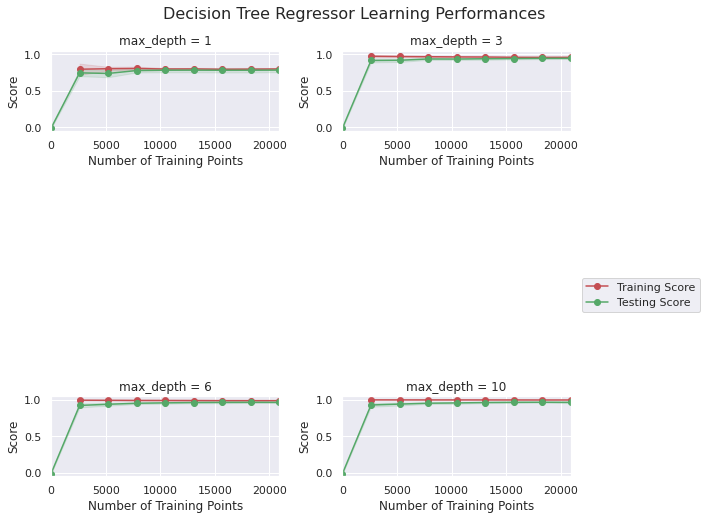

In [81]:
vs.ModelLearning(features, cases)

### Complexity Curves
The following code cell produces a graph for a `'Decision Tree Regressor'` model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves. For getting the score `accuracy` of the model on the selected features we will be using `R2 score` which is also known as `coefficient_of_determination`.

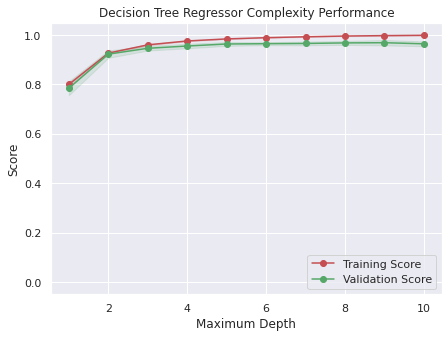

In [82]:
vs.ModelComplexity(features, cases)

---
# Step 4
## Model Training

### Shuffle and Split Data
First of all we will split the data for training and testing sets. For training we will be using 80% of the data and 20% will be used in the testing of the model.

In [80]:
# Shuffle and spliting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, cases, test_size=0.2, random_state=2)

# Success
print("Training and testing split was successful.")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training and testing split was successful.
Training set has 20907 samples.
Testing set has 5227 samples.


### Performance Metric function
For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify the model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

In [85]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculating the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_predict, y_true)

    # Return the score
    return score

Now we will train a model using the **decision tree algorithm**. We will be using `'grid search technique'` to ensure that we are producing an optimized model and this will also helps in the optimization of `'max_depth'` parameter for the decision tree.

We will also be using `'cross validation'` technique which will also optimize the learning process of the model.

- Information about the model [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- Information about scoring function [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)
- Information about [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [86]:
# Importing 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Creating cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 2)
    
    # Initialzing and Creating a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Creating a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = { "max_depth" : np.arange(1, 11) }
    
    # Transforming 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Creating the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [87]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 7 for the optimal model.


---
# Step 5
## Model Testing
Now after training we will be testing our optimized model from the **data seperated for testing**. After testing we will also plot the values in the scatter plot for visualization purpose

Model has a coefficient of determination, R^2, of 0.978.




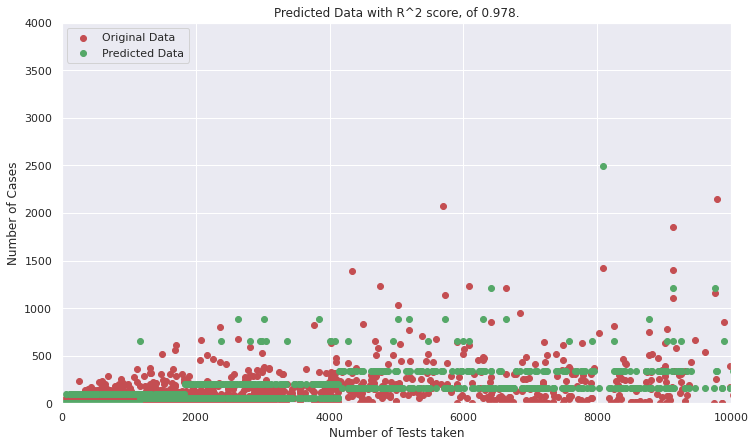

In [90]:
# Testing the model
y_pred = reg.predict(X_test)

# Calculate the performance of this model
score = performance_metric(y_test, y_pred)
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))
print('\n')

# Plotting the data in the graph
plt.figure(figsize=(12, 7))
plt.grid(True)
plt.scatter(X_test["total_cases"][:], y_test[:], color='r', label="Original Data")
plt.scatter(X_test["total_cases"][:], y_pred[:], color="g", label="Predicted Data")

# Setting limit for x and y axis values
plt.xlim(0, 10000)
plt.ylim(0, 4000)

plt.title('Predicted Data with R^2 score, of {:.3f}.'.format(score))
plt.xlabel("Number of Tests taken")
plt.ylabel("Number of Cases")
plt.legend(loc = 'upper left')
plt.show()

---
# Step 6
## Plotting Desicion Tree Regressor
Now we will plot the desicion tree generated by our model, this will help us in the visualization of our model by which it takes desicions.

In [91]:
# Ecporting the tree in a file model_tree.pdf
from sklearn import tree
import graphviz

columns = list(X_train.columns)
tree_data = tree.export_graphviz(reg, feature_names=columns)
graph = graphviz.Source(tree_data)
graph.render("model_tree", view=True)

'model_tree.pdf'